#Install Libraries

In [1]:
!pip install diffusers transformers accelerate torch

#Load Model

In [2]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image

# Check if GPU is available (Required for fast generation)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion v1.5
# Using float16 for efficiency on Colab's free GPU
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

print(f"Model loaded successfully on {device}")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model loaded successfully on cuda


#Generate Data

In [3]:
# 1. Define Input Prompts (Requirement: At least 5 prompts)
prompts = [
    "A cyberpunk street market at night with neon rain",
    "A photorealistic astronaut meditating on Mars",
    "A golden retriever wearing a wizard hat in a library",
    "A futuristic city floating in the clouds, ghibli style",
    "A crystal chess set with glowing pieces"
]

# 2. Create Output Folder (Requirement: Save in folder)
output_folder = "synthetic_dataset"
os.makedirs(output_folder, exist_ok=True)

generated_images = []

print("Starting Data Generation...")

# 3. Generation Loop
for i, prompt in enumerate(prompts):
    # Generate image
    image = pipe(prompt).images[0]

    # Save image
    file_name = f"{output_folder}/sample_{i+1}.png"
    image.save(file_name)
    generated_images.append(image)

    print(f"Saved: {file_name} | Prompt: {prompt}")

print(f"\nSuccess! All images saved in '{output_folder}' folder.")

Starting Data Generation...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_dataset/sample_1.png | Prompt: A cyberpunk street market at night with neon rain


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_dataset/sample_2.png | Prompt: A photorealistic astronaut meditating on Mars


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_dataset/sample_3.png | Prompt: A golden retriever wearing a wizard hat in a library


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_dataset/sample_4.png | Prompt: A futuristic city floating in the clouds, ghibli style


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: synthetic_dataset/sample_5.png | Prompt: A crystal chess set with glowing pieces

Success! All images saved in 'synthetic_dataset' folder.


#Display Results

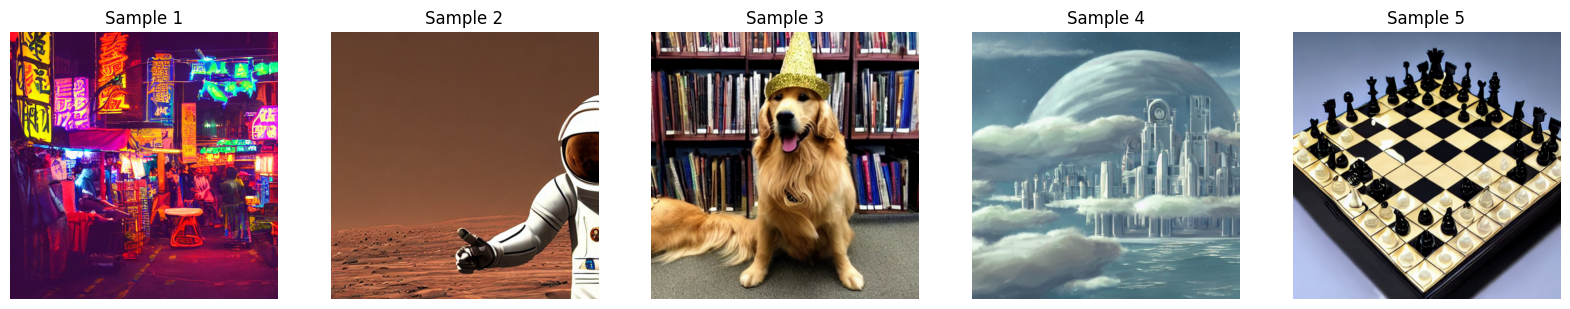

In [4]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(20, 10))

for i, img in enumerate(generated_images):
    plt.subplot(1, 5, i+1) # 1 row, 5 columns
    plt.imshow(img)
    plt.title(f"Sample {i+1}")
    plt.axis("off")

plt.show()

#Download for Submission

In [5]:
import shutil
from google.colab import files

# Zip the dataset folder
shutil.make_archive('submission_dataset', 'zip', output_folder)

# Trigger automatic download
files.download('submission_dataset.zip')

print("Download started for 'submission_dataset.zip'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started for 'submission_dataset.zip'
